In [1]:
from utils.data_prep import prepare_data
from utils.data_prep import prepare_data_augmented

import numpy as np
import gsd.hoomd
import freud
import matplotlib.pyplot as plt

In [2]:
np.random.seed(999)

In [3]:
num_neighbors = 6

# Prepare non-agumented data. Load tratrajectory data and specify the frames for training and testing data. 
Here we use 6 neighboring particles to calculate non-augmented descriptors. 

In [4]:
# prepare non-augmented data
data = []
num_neighbors = 6
N_chosen_frame = 100
traj_name = "data/cubes_fluid.gsd"
t = gsd.hoomd.open(traj_name)
traj_len = len(t)
chosen_frame = np.linspace(0, traj_len, N_chosen_frame, endpoint=False).astype(int).tolist()
data.append(prepare_data(traj_name, chosen_frame, num_neighbors, class_label=0))

N_chosen_frame = 50
traj_name = "data/cubes_crystal_1.gsd"
t = gsd.hoomd.open(traj_name)
traj_len = len(t)
chosen_frame = np.linspace(0, traj_len, N_chosen_frame, endpoint=False).astype(int).tolist()
data.append(prepare_data(traj_name, chosen_frame, num_neighbors, class_label=1))

N_chosen_frame = 50
traj_name = "data/cubes_crystal_2.gsd"
t = gsd.hoomd.open(traj_name)
traj_len = len(t)
chosen_frame = np.linspace(0, traj_len, N_chosen_frame, endpoint=False).astype(int).tolist()
data.append(prepare_data(traj_name, chosen_frame, num_neighbors, class_label=1))

data = np.vstack(data)

# Make sure there is no corrupted data

In [5]:
print(np.where(np.isnan(data)))
data = np.delete(data, np.where(np.isnan(data))[0], axis=0)

(array([], dtype=int64), array([], dtype=int64))


# Check the number of data points among classes

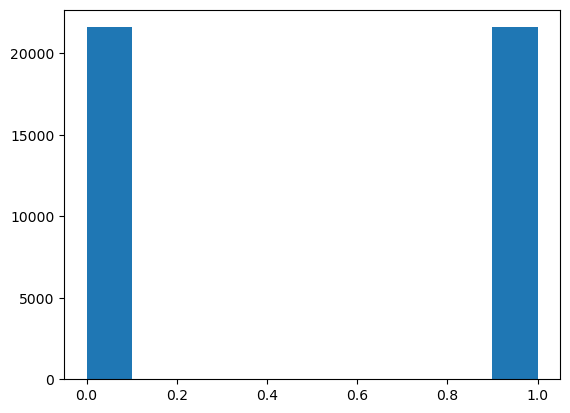

In [6]:
plt.hist(data[:, -1]);

# Balance the number of data points among classes by randomly droping particles

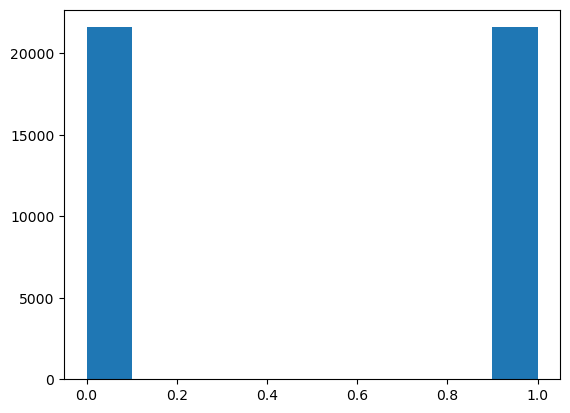

In [7]:
drop_labels = [0]
minimal_label = 1
drop_idxs = []
for d_l in drop_labels:
    minimal_class_idxs = np.where(data[:, -1] == minimal_label)[0]
    trim_class_idxs = np.where(data[:, -1] == d_l)[0]
    num_diff = np.abs(len(trim_class_idxs) - len(minimal_class_idxs)).astype(int)
    np.random.shuffle(trim_class_idxs)
    drop_idxs.append(trim_class_idxs[:num_diff])

drop_idxs = np.hstack(drop_idxs)
data_trim = np.delete(
    data, 
    drop_idxs,
    axis=0
)
plt.hist(data_trim[:, -1]);

# Train-validation split

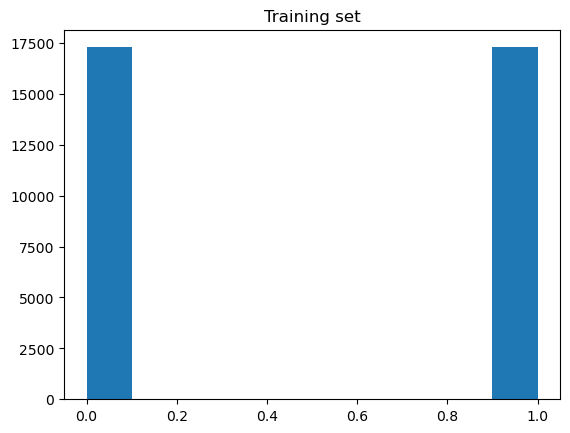

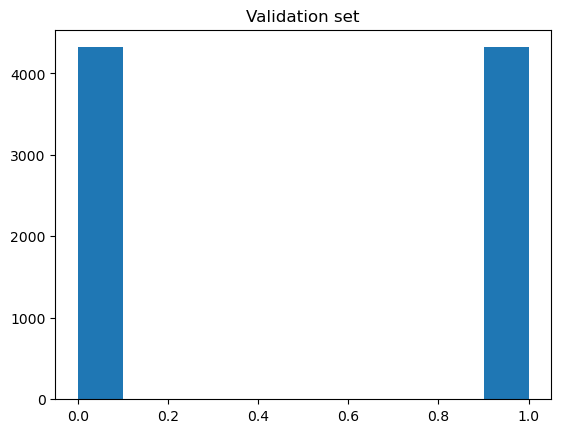

In [8]:
data_train = []
data_val = []
N_class = 2
for i in range(N_class):
    label_idx = np.where(data_trim[:, -1] == i)[0]
    num_data_perclass = len(label_idx)
    split = int(num_data_perclass * 4 / 5)
    data_train.append(data_trim[label_idx[:split], :])
    data_val.append(data_trim[label_idx[split:], :])
data_train = np.vstack(data_train)                    
data_val = np.vstack(data_val)
plt.figure()
plt.hist(data_train[:, -1]);
plt.title("Training set");
plt.figure()
plt.hist(data_val[:, -1]);
plt.title("Validation set");

# Save non-agumented data

In [9]:
np.save("train_data", data_train)
np.save("val_data", data_val)

# Prepare augmented data. Load trajectory data and specify the frames for training and testing data. 
Here we use 6 neighboring particles to calculate augmented descriptors. 

In [10]:
# prepare augmented data
data = []
D_theta = 2
D_phi = 4

num_neighbors = 6
N_chosen_frame = 100
traj_name = "data/cubes_fluid.gsd"
t = gsd.hoomd.open(traj_name)
traj_len = len(t)
chosen_frame = np.linspace(0, traj_len, N_chosen_frame, endpoint=False).astype(int).tolist()
data.append(prepare_data_augmented(traj_name, chosen_frame, num_neighbors, class_label=0, D_theta=D_theta, D_phi=D_phi))

N_chosen_frame = 50
traj_name = "data/cubes_crystal_1.gsd"
t = gsd.hoomd.open(traj_name)
traj_len = len(t)
chosen_frame = np.linspace(0, traj_len, N_chosen_frame, endpoint=False).astype(int).tolist()
data.append(prepare_data_augmented(traj_name, chosen_frame, num_neighbors, class_label=1, D_theta=D_theta, D_phi=D_phi))

N_chosen_frame = 50
traj_name = "data/cubes_crystal_2.gsd"
t = gsd.hoomd.open(traj_name)
traj_len = len(t)
chosen_frame = np.linspace(0, traj_len, N_chosen_frame, endpoint=False).astype(int).tolist()
data.append(prepare_data_augmented(traj_name, chosen_frame, num_neighbors, class_label=1, D_theta=D_theta, D_phi=D_phi))

data = np.vstack(data)

# Make sure there is no corrupted data

In [11]:
print(np.where(np.isnan(data)))
data = np.delete(data, np.where(np.isnan(data))[0], axis=0)

(array([], dtype=int64), array([], dtype=int64))


# Check the number of data points among classes

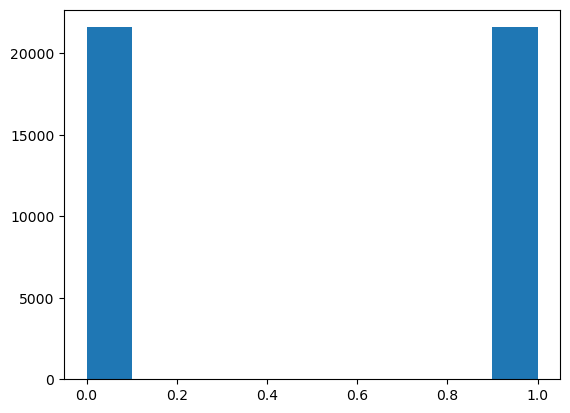

In [12]:
plt.hist(data[:, -1]);

# Balance the number of data points among classes by randomly droping particles

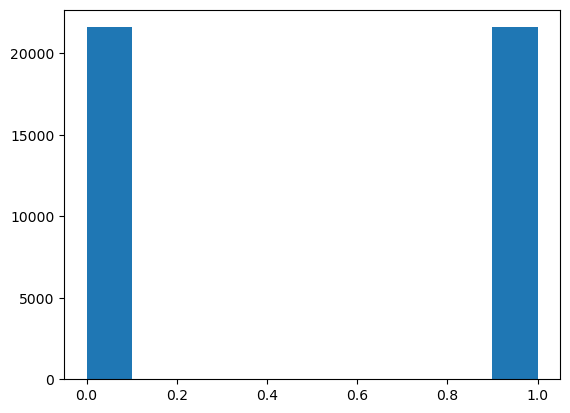

In [13]:
drop_labels = [0]
minimal_label = 1
drop_idxs = []
for d_l in drop_labels:
    minimal_class_idxs = np.where(data[:, -1] == minimal_label)[0]
    trim_class_idxs = np.where(data[:, -1] == d_l)[0]
    num_diff = np.abs(len(trim_class_idxs) - len(minimal_class_idxs)).astype(int)
    np.random.shuffle(trim_class_idxs)
    drop_idxs.append(trim_class_idxs[:num_diff])

drop_idxs = np.hstack(drop_idxs)
data_trim = np.delete(
    data, 
    drop_idxs,
    axis=0
)
plt.hist(data_trim[:, -1]);

# Train-validation split

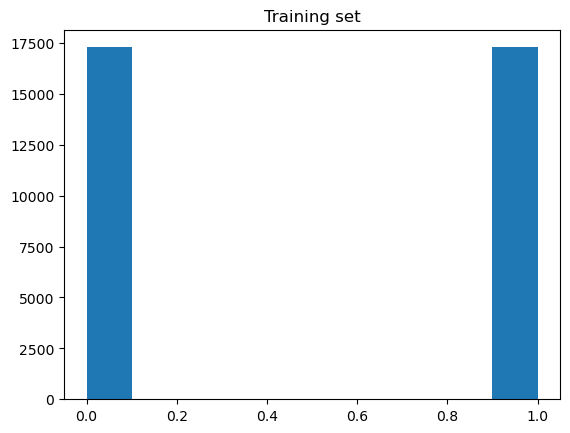

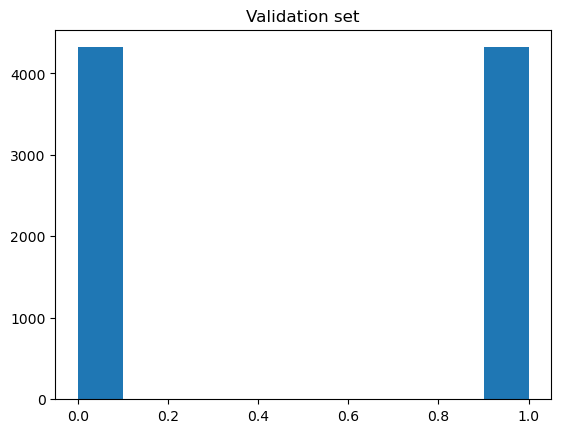

In [14]:
data_train = []
data_val = []
N_class = 2
for i in range(N_class):
    label_idx = np.where(data_trim[:, -1] == i)[0]
    num_data_perclass = len(label_idx)
    split = int(num_data_perclass * 4 / 5)
    data_train.append(data_trim[label_idx[:split], :])
    data_val.append(data_trim[label_idx[split:], :])
data_train = np.vstack(data_train)                    
data_val = np.vstack(data_val)
plt.figure()
plt.hist(data_train[:, -1]);
plt.title("Training set");
plt.figure()
plt.hist(data_val[:, -1]);
plt.title("Validation set");

# Save the agumented data

In [15]:
np.save("train_data_augmented", data_train)
np.save("val_data_augmented", data_val)